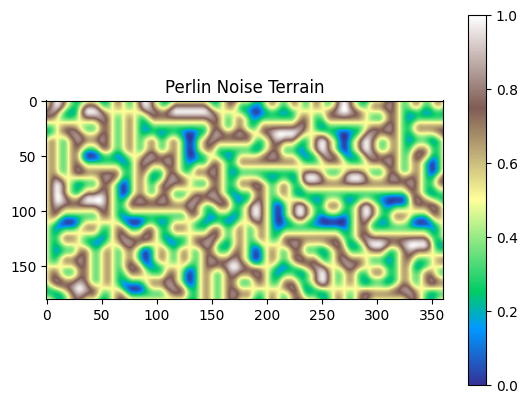

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_perlin_noise(width, height, scale=10, seed=None):
    if seed is not None:
        np.random.seed(seed)

    def fade(t):
        return 6*t**5 - 15*t**4 + 10*t**3

    def lerp(a, b, t):
        return a + t * (b - a)

    def gradient(h, x, y):
        vectors = np.array([[0,1], [0,-1], [1,0], [-1,0]])
        g = vectors[h % 4]
        return g[..., 0]*x + g[..., 1]*y

    # Grid size
    grid_x = width // scale + 2
    grid_y = height // scale + 2

    # Random hash values
    hash_grid = np.random.randint(0, 256, size=(grid_y, grid_x))

    # Generate 2D coordinate grid
    y_vals = np.linspace(0, grid_y - 2, height, endpoint=False)
    x_vals = np.linspace(0, grid_x - 2, width, endpoint=False)
    xv, yv = np.meshgrid(x_vals, y_vals)

    xi = xv.astype(int)
    yi = yv.astype(int)
    xf = xv - xi
    yf = yv - yi

    u = fade(xf)
    v = fade(yf)

    # Gradients at each corner
    n00 = gradient(hash_grid[yi,   xi  ], xf,   yf)
    n10 = gradient(hash_grid[yi,   xi+1], xf-1, yf)
    n01 = gradient(hash_grid[yi+1, xi  ], xf,   yf-1)
    n11 = gradient(hash_grid[yi+1, xi+1], xf-1, yf-1)

    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)
    noise = lerp(x1, x2, v)

    # Normalize to 0–1
    noise = (noise - noise.min()) / (noise.max() - noise.min())
    return noise

# Usage
width, height = 360, 180
scale = 20

terrain = generate_perlin_noise(width, height, scale, seed=42)
plt.imshow(terrain, cmap='terrain')
plt.colorbar()
plt.title("Perlin Noise Terrain")
plt.show()


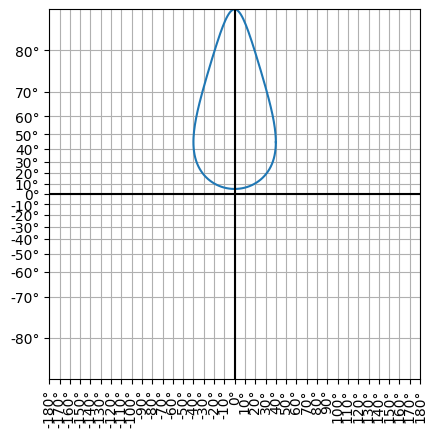

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r = 40


fig, ax = plt.subplots()

theta = np.linspace(0, 2*np.pi, 200)
x = r * np.cos(theta)
y = r * np.sin(theta) + 45  # latitude in degrees

def mercator_projection_converter(
        lat_coords, 
        long_coords,
        longlims = (-180,180), 
        latlims = (-85,85), 
        dlong = 10, 
        dlat = 10, 
        axline = True,
        grid = True,
        long_label_rotation = 90):
    """
    Plot coordinates on a Mercator projection with properly labeled latitude and longitude axes.

    Parameters:
    ----------
    long_coords : array-like
        List or array of longitudes in degrees to plot.
    
    lat_coords : array-like
        List or array of latitudes in degrees to plot. Will be transformed using the Mercator projection.

    longlims : tuple of float, optional
        Tuple (min_long, max_long) specifying the longitude range (in degrees) to display on the x-axis.
        Default is (-180, 180).
    
    latlims : tuple of float, optional
        Tuple (min_lat, max_lat) specifying the latitude range (in degrees) to display on the y-axis.
        Values are clamped to avoid ±90°, where Mercator projection diverges. Default is (-85, 85).
    
    dlong : int, optional
        Spacing between longitude tick marks in degrees. Default is 10.

    dlat : int, optional
        Spacing between latitude tick marks in degrees. Default is 10.

    axline : bool, optional
        If True, draw black x=0 and y=0 axes. Default is True.

    grid : bool, optional
        If True, enable major gridlines. Default is True.

    long_label_rotation : int, optional
        Rotation angle (in degrees) for the x-axis (longitude) tick labels. Default is 90.

    Returns:
    -------
    None
        Displays the plot using matplotlib with Mercator-transformed latitude and standard longitude.
    """
    def lat_to_mercator_deg(y_deg):
        y_merc = np.log(np.tan(np.pi/4 + (np.radians(y_deg)/2)))
        return np.degrees(y_merc)

    def mercator_deg_to_lat(y_merc_deg):
        y_rad = np.radians(y_merc_deg)
        lat_rad = 2 * np.arctan(np.exp(y_rad)) - np.pi/2
        return np.degrees(lat_rad)

    # Plot
    y_m = lat_to_mercator_deg(lat_coords)  # convert to Mercator y in degrees
    ax.plot(x, y_m)
    if axline:
        ax.axhline(0, color="black")
        ax.axvline(0, color="black")
    if grid:
        ax.grid()
    ax.set_aspect('equal')

    min_lat, max_lat = latlims
    min_long, max_long = longlims
    min_lat_label, max_lat_label = int(np.ceil(min_lat / dlat)) * dlat, int(np.floor(max_lat / dlat)) * dlat
    lat_tick_degs = np.arange(min_lat_label, max_lat_label + dlat, dlat)
    y_tick_positions = lat_to_mercator_deg(lat_tick_degs)

    min_long_label, max_long_label = int(np.ceil(min_long / dlong)) * dlong, int(np.floor(max_long / dlong)) * dlong
    xticks = np.arange(min_long_label, max_long_label + dlong, dlong)
    ax.set_xticks(xticks)
    ax.set_xticklabels(f"{long}°" for long in xticks)
    ax.tick_params(axis='x', labelrotation=long_label_rotation)
    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels([f"{lat}°" for lat in lat_tick_degs])

    ylims = [min_lat, max_lat]
    ax.set_ylim(lat_to_mercator_deg(ylims))
    plt.show()

mercator_projection_converter(x,y)